## a-AlphaBio homework 
### Run inference with some of the trained models
### Mark Thompson
### Started April 29, 2024 

In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

---------
### Holdout dataset

In [8]:
# The holdout data
data_file = '../data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

holdout dataframe has 30071 rows
['description_a', 'sequence_a', 'description_alpha', 'sequence_alpha']
count                                                 30071
unique                                                29971
top       QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLE...
freq                                                    101
Name: sequence_a, dtype: object


----
### MLP model

In [ ]:
!!! also check preds for validation dataset !!!! and look at pred falling inside/outside [Kd-low, Kd, Kd-high] range

len(preds): 30071
preds[0:10]: [3.3806827068328857, 3.2153608798980713, 3.2733681201934814, 3.3257968425750732, 3.320401191711426, 3.4491589069366455, 3.1305391788482666, 3.5066840648651123, 3.028456449508667, 2.473449468612671]


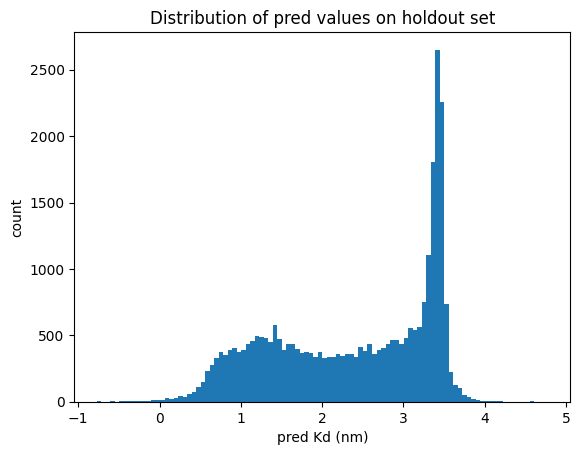

In [9]:
preds = pk.load(open('../inference_results/preds_mlp.pkl', 'rb'))
print('len(preds):', len(preds))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Histogram of predicted values
plt.hist(preds, bins=100)
plt.xlabel('pred Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of pred values on holdout set')
plt.show()


len(preds): 2920 , len(y): 2920
preds[0:10]: [3.444391965866089, 3.400648355484009, 3.541489362716675, 3.4681921005249023, 3.3752424716949463, 3.511237144470215, 3.4526431560516357, 2.9764811992645264, 3.3396494388580322, 3.197770833969116]
rmse: 1.0752791750998076


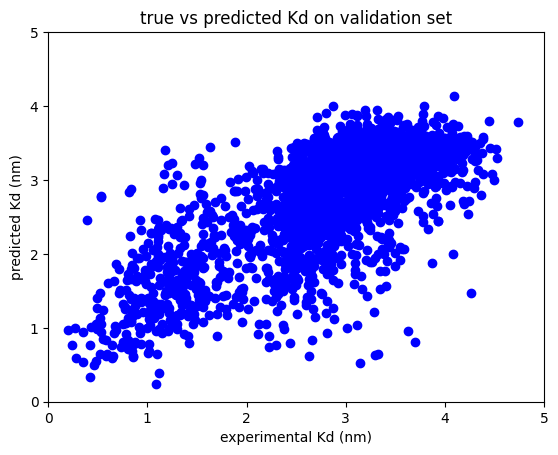

In [17]:
# Inference on the validation set to compare actual with predicted values
preds = pk.load(open('/home/mark/dev/aAlphaBio-Homework/inference_results/preds_mlp_1714519460.345232.pkl', 'rb'))
y     = pk.load(open('/home/mark/dev/aAlphaBio-Homework/inference_results/y_mlp_1714519460.3456798.pkl', 'rb'))
print('len(preds):', len(preds), ', len(y):', len(y))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Calc the root mean squared error
rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
print('rmse:', rmse)

# scatter plot of true vs pred
plt.scatter(y, preds, c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('predicted Kd (nm)')
plt.title('true vs predicted Kd on validation set')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()


----
### Dense MLP model

len(preds): 30071
preds[0:10]: [2.4990644454956055, 2.0807547569274902, 2.661569118499756, 2.9562244415283203, 2.1652021408081055, 3.481377124786377, 2.993251323699951, 3.4557700157165527, 2.881880283355713, 2.619324207305908]


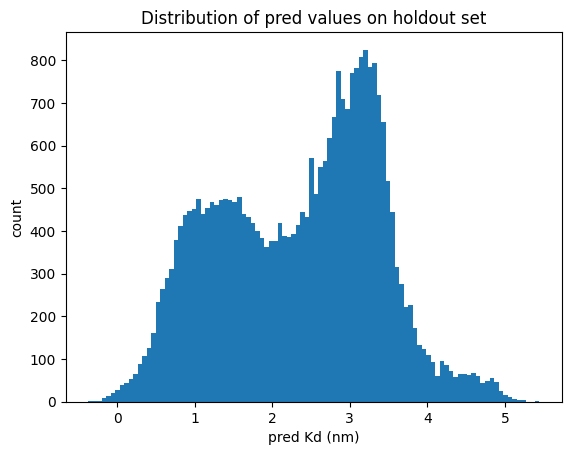

In [15]:
preds = pk.load(open('../inference_results/preds_dense_mlp.pkl', 'rb'))
print('len(preds):', len(preds))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Histogram of predicted values
plt.hist(preds, bins=100)
plt.xlabel('pred Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of pred values on holdout set')
plt.show()


len(preds): 2920 , len(y): 2920
preds[0:10]: [3.0033907890319824, 3.1836142539978027, 3.355527400970459, 3.3417296409606934, 3.392061233520508, 3.1957573890686035, 3.7944135665893555, 2.838082790374756, 3.279926300048828, 3.2691006660461426]
rmse: 1.0595144221365784


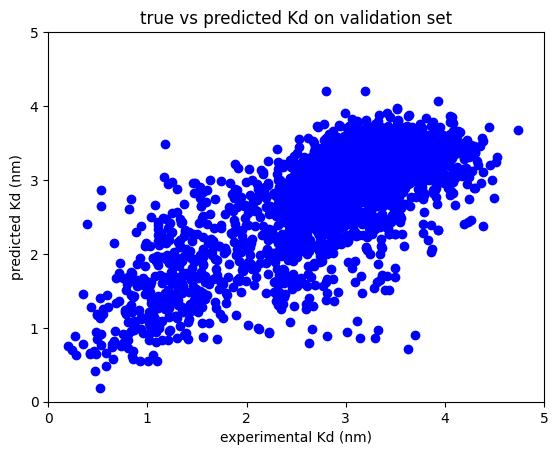

In [16]:
# Inference on the validation set to compare actual with predicted values
preds = pk.load(open('/home/mark/dev/aAlphaBio-Homework/inference_results/preds_dense_mlp_1714520055.8448465.pkl', 'rb'))
y     = pk.load(open('/home/mark/dev/aAlphaBio-Homework/inference_results/y_dense_mlp_1714520055.845317.pkl', 'rb'))
print('len(preds):', len(preds), ', len(y):', len(y))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Calc the root mean squared error
rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
print('rmse:', rmse)

# scatter plot of true vs pred
plt.scatter(y, preds, c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('predicted Kd (nm)')
plt.title('true vs predicted Kd on validation set')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()


----
### BERT (raw)
i.e. Start with un-pre-trained fine-tune model and train from scratch


In [ ]:
todo in progress....

preds = pk.load(open('./inference/preds_bert_raw.pkl', 'rb'))
print('len(preds):', len(preds))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Histogram of predicted values
plt.hist(preds, bins=100)
plt.xlabel('pred Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of pred values on holdout set')
plt.show()


In [ ]:
# Inference on the validation set to compare actual with predicted values
preds = pk.load(open(???, 'rb'))
y     = pk.load(open(???, 'rb'))
print('len(preds):', len(preds), ', len(y):', len(y))
preds = [p[0] for p in preds]
print('preds[0:10]:', preds[0:10])

# Calc the root mean squared error
rmse = math.sqrt(np.mean((np.array(y) - np.array(preds))**2))
print('rmse:', rmse)

# scatter plot of true vs pred
plt.scatter(y, preds, c ="blue")
plt.xlabel('experimental Kd (nm)')
plt.ylabel('predicted Kd (nm)')
plt.title('true vs predicted Kd on validation set')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()


----
### BERT (for real)
i.e. Start with BERT pre-trained on OAS dataset, then fine-tuned on scFv training dataset
